### **TASK-1A i)**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import tree


In [ ]:
iris = load_iris()
X = iris.data
y = iris.target


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)



In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)


In [ ]:
y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9555555555555556


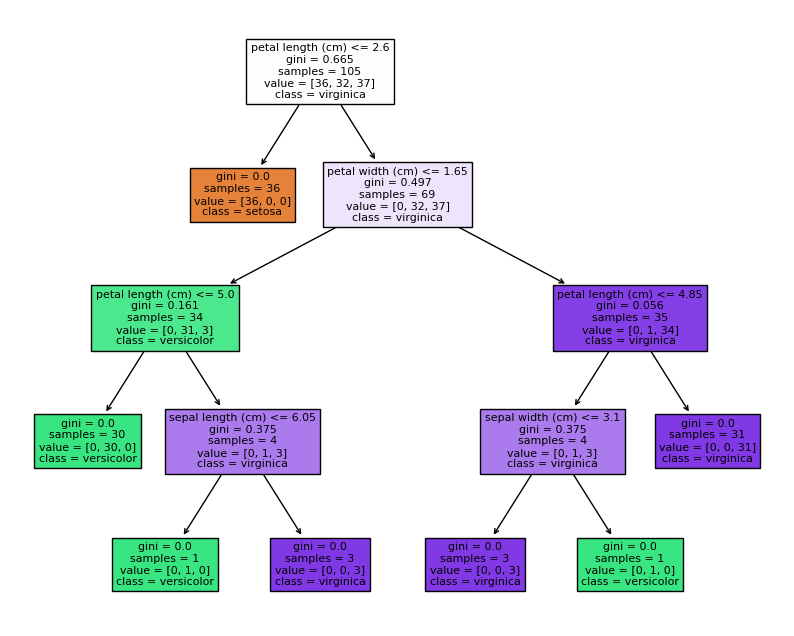

In [ ]:
fig = plt.figure(figsize=(10, 8))
_ = tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()


**BACK PROPOGATION ALGORITHM USING ML FUNDAMENTALS**


## **TASK 1A ii)**

In [ ]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Define Neural Network Class
class NeuralNetwork:
    def __init__(self, x, y):
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[1], 6)  # Increase neurons in layer 1
        self.weights2 = np.random.rand(6, 4)  # Additional hidden layer
        self.weights3 = np.random.rand(4, 1)  # Output layer
        self.y = y.reshape(-1, 1)
        self.output = np.zeros(self.y.shape)

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.layer2 = sigmoid(np.dot(self.layer1, self.weights2))
        self.output = sigmoid(np.dot(self.layer2, self.weights3))

    def backprop(self):
        d_weights3 = np.dot(self.layer2.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights2 = np.dot(self.layer1.T, (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights3.T) * sigmoid_derivative(self.layer2)))
        d_weights1 = np.dot(self.input.T, (np.dot(np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights3.T) * sigmoid_derivative(self.layer2), self.weights2.T) * sigmoid_derivative(self.layer1)))
        self.weights1 += d_weights1
        self.weights2 += d_weights2
        self.weights3 += d_weights3

    def train(self, X, y, epochs=1000):
        self.input = X
        self.y = y.reshape(-1, 1)
        for epoch in range(epochs):
            self.feedforward()
            self.backprop()

    def predict(self, X):
        self.input = X
        self.feedforward()
        return self.output

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Create Dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Normalize the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Neural Network
nn = NeuralNetwork(X_train, y_train)
nn.train(X_train, y_train, epochs=5000)  # Increase the number of epochs

# Predict on Test Data
y_pred = nn.predict(X_test)
y_pred = [1 if i > 0.5 else 0 for i in y_pred]

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.52
